# Objectives

By the end of this section, you will be able to:

* Describe the conditions under which an object has a terminal speed.

In [5]:
import numpy as np  
import matplotlib.pyplot as plt
from matplotlib import cm 
import pandas as pd

%matplotlib inline

In [6]:
rho = 1E3
C = 0.47
R = 0.10
A = np.pi*R**2
v = 0
dv = 1
Fs = 0
FsList = []  #create an empty list for pressure
vList= []   #create an empty list for depth

while v < 20:         #loop through h = 0 to h = -100
    dFs = Fs + 0.5*rho*C*A*v**2
    Fs = Fs + dFs
    v = v + dv
    FsList.append(Fs)     #Adding each new value of P to the list 
    vList.append(v)     #Adding each new value of h to the list 
    
print('Stokes Drag',FsList)
print('Velocity',vList)

Stokes Drag [0.0, 7.382742735936015, 44.296456415616085, 155.03759745465632, 428.1990786842889, 1040.9667257669782, 2347.7121900276534, 5057.178774116172, 10586.853083332247, 21771.708328275312, 44281.69093014422, 89456.69373133671, 179976.5024166482, 361200.6883556696, 723848.3942875827, 1449357.905690751, 2900605.7935219016, 5803345.199694488, 11609082.40803542, 23220829.986198515]
Velocity [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


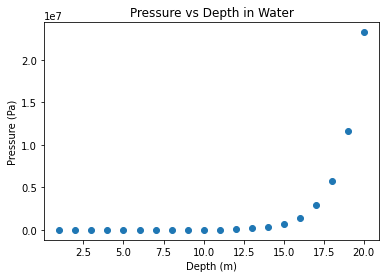

In [7]:
plt.scatter(vList,FsList)
plt.xlabel('Depth (m)')
plt.ylabel('Pressure (Pa)')
plt.title('Pressure vs Depth in Water')
plt.show()

In [8]:
from vpython import *

In [9]:
#Define our global varibles
g = 9.81
c = 0.5
rho = 12
eta = 0.07
t  = 0
dt=0.01

#Define force of gravity, drag force, and momentum functions
def Fg(a):
    Fg_mag = a.mass*g
    Fg_dir = norm(vec(0,-1,0))
    Fg_val = Fg_mag*Fg_dir
    return Fg_val

def Fdrag(a):
    Fdrag_mag = 6*pi*a.radius*eta*mag(a.velocity)
    Fdrag = -Fdrag_mag*a.velocity.hat
    return Fdrag

def p(a):
    p = (a.mass)*(a.velocity)
    return p

In [ ]:
#Define our live graphs
graph1 = graph(width=400,height=300,align="right", title='Particle 1 Position Vs. Time', xtitle='Time(s)',ytitle='Position(m)', foreground=color.black, background=color.white)
graph2 = graph(width=400,height=300,align="left", title='Particle 2 Position Vs. Time', xtitle='Time(s)',ytitle='Position(m)', foreground=color.black, background=color.white)

#Define the curves to which our graphs will draw 
Graph_xpos1 = gcurve(graph = graph1,color=color.blue)
Graph_ypos1 = gcurve(graph = graph1,color=color.red)
Graph_xpos2 = gcurve(graph = graph2,color=color.blue)
Graph_ypos2 = gcurve(graph = graph2,color=color.red)

In [ ]:
#Define our scene
scene = canvas( width=500, height=500,background = color.white)
scene.camera.pos = vec(-30,10,40)
scene.camera.axis = vec(0,0,-10)

#Define our floor, particles, and vectors
floor = box (pos=vector(0,0, 0), size=vector(200, 0.2, 200),  color = color.green,opacity = 1)
particle1 = sphere( pos = vector(-30,10,0), radius = 0.5, mass = 1, velocity = vec(10,10,0), p = vec(0,0,0),Fg = vec(0,0,0), Fdrag= vec(0,0,0), color =color.red, make_trail=True, trail_type="points", interval=20, retain=20)
particle2 = sphere( pos = vector(-32,10,0), radius = 0.5, mass = 1, velocity = vec(10,10,0), p = vec(0,0,0),Fg = vec(0,0,0), Fdrag= vec(0,0,0), color =color.blue, make_trail=True, trail_type="points", interval=20, retain=20)
attach_arrow(particle1,"Fg", color=color.orange)
attach_arrow(particle1,"Fdrag", color=color.blue)
attach_arrow(particle2,"Fg", color=color.orange)

while (t<20):
    rate(100)
    #Calculate the momentum 
    particle1.p = p(particle1)
    particle2.p = p(particle2)
    
    #Calculate the force of gravity 
    particle1.Fg = Fg(particle1)
    particle2.Fg = Fg(particle2)

    #Calculate the drag force
    particle1.Fdrag = Fdrag(particle1)
    particle2.Fdrag = Fdrag(particle2)
    
    #Calculate the net force
    Fnet1 = particle1.Fdrag + particle1.Fg
    Fnet2 = particle2.Fg
    
    #Calcuate the position, velocity and updated momentum
    particle1.pos = particle1.pos + (particle1.velocity)*dt
    particle1.velocity = particle1.velocity + (Fnet1/particle1.mass)*dt
    particle1.p = particle1.p + Fnet1*dt
    
    #Calcuate the position, velocity and updated momentum
    particle2.pos = particle2.pos + (particle2.velocity)*dt
    particle2.velocity = particle2.velocity + (Fnet2/particle2.mass)*dt
    particle2.p = particle2.p + Fnet2*dt
    
    #Graph the motion of our particles
    Graph_xpos1.plot(pos=(t,particle1.pos.x))
    Graph_ypos1.plot(pos=(t,particle1.pos.y))
    Graph_xpos2.plot(pos=(t,particle2.pos.x))
    Graph_ypos2.plot(pos=(t,particle2.pos.y))
    
    #Make the balls bounce off the floor
    if (floor.pos.y+0.2+particle1.radius > particle1.pos.y):
        particle1.velocity.y = -particle1.velocity.y
    if (floor.pos.y+0.2+particle2.radius > particle2.pos.y):
        particle2.velocity.y = -particle2.velocity.y
    t = t+dt